In [1]:
# Imports
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
import csv
import random

In [5]:
reclustered_monthly_data = pd.read_csv("output_hpc/reclustered_monthly_data_final.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

In [6]:
data = reclustered_monthly_data.head(100)

In [7]:
n_rows = data.shape[0]

In [8]:
data["A"] = np.random.rand(n_rows)
data["F"] = np.random.rand(n_rows)
data["N"] = np.random.rand(n_rows)

/tmp/ipykernel_20241/686247784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["A"] = np.random.rand(n_rows)
/tmp/ipykernel_20241/686247784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["F"] = np.random.rand(n_rows)
/tmp/ipykernel_20241/686247784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [9]:
data_avg = data.groupby("user")[['A', 'F', 'N']].mean().reset_index()

In [10]:
max_val = data_avg.iloc[1][["A", "F", "N"]].max()
max_col = data_avg.iloc[1][["A", "F"]].idxmax()
print(max_val *-1)
print(max_val, max_col)

-0.29522626474998503
0.29522626474998503 A


In [11]:
def get_stance(row): 
    if row["N"] == 1.0: 
        return 0
    elif row["A"] > row["F"]:
        return row["A"]
    elif row["F"] > row["A"]:
        return row["F"]*-1
    else: 
        return random.choice([row["A"], row["F"]])

In [12]:
data_avg["stance"] = data_avg.apply(lambda x: get_stance(x), axis = 1)

#### Getting the stance for each user for each topic

In [13]:
def make_dataset(data):
    data = reclustered_monthly_data.head(100)
    n_rows = data.shape[0]
    data["A"] = np.random.rand(n_rows)
    data["F"] = np.random.rand(n_rows)
    data["N"] = np.random.rand(n_rows)
    data_avg = data.groupby("user")[['A', 'F', 'N']].mean().reset_index()
    data_avg["stance"] = data_avg.apply(lambda x: get_stance(x), axis = 1)
    return data_avg

In [14]:
data_1 = make_dataset(reclustered_monthly_data)
data_2 = make_dataset(reclustered_monthly_data)
data_3 = make_dataset(reclustered_monthly_data)

/tmp/ipykernel_20241/2471956829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["A"] = np.random.rand(n_rows)
/tmp/ipykernel_20241/2471956829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["F"] = np.random.rand(n_rows)
/tmp/ipykernel_20241/2471956829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [15]:
data1 = data_1.rename(columns={"stance": "stance_1"})
data2 = data_2.rename(columns={"stance": "stance_2"})
data3 = data_3.rename(columns={"stance": "stance_3"})

In [16]:
merged_df = pd.merge(pd.merge(data1, data2, on='user'), data3, on='user')

In [17]:
merged_df = merged_df[["user", "stance_1", "stance_2", "stance_3"]]
merged_df

,user,stance_1,stance_2,stance_3
0,AlbionPrince,0.171462,-0.055712,-0.427786
1,BenFoldsFourLoko,-0.995200,0.698206,-0.918101
2,Betrashndie,-0.939670,0.090637,-0.741719
3,BloodWiz,-0.558810,0.611499,-0.951529
4,Call_Me_Hurr1cane,-0.996521,0.575361,0.143879
...,...,...,...,...
91,thebigslapper,-0.746673,-0.785728,0.598537
92,throwrowrowawayyy,-0.829177,-0.441413,0.999226
93,trogon,-0.743226,0.863488,0.804480
94,weeteacups,-0.695817,-0.387806,0.652465


#### Dimensionality reduction - UMAP 

In [18]:
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/home/dara/miniconda3/envs/bach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
merged_df_umap = merged_df.copy()

In [60]:
reducer = umap.UMAP(random_state=42) #object of class UMAP
scaler = StandardScaler()

In [61]:
# Fit and transform the numerical columns
merged_df_umap[['stance_1', 'stance_2', 'stance_3']] = scaler.fit_transform(merged_df_umap[['stance_1', 'stance_2', 'stance_3']])
merged_df_umap.head()

,user,stance_1,stance_2,stance_3
0,AlbionPrince,0.261182,1.455493,0.804391
1,BenFoldsFourLoko,1.022881,-1.310882,0.773403
2,Betrashndie,-0.888670,-0.910540,-0.652259
3,BloodWiz,-0.675771,1.083281,0.934980
4,Call_Me_Hurr1cane,1.133933,-1.314867,-0.665768


/home/dara/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Features' shape: (96, 2)
                user  Component 1  Component 2
0       AlbionPrince     3.568209    -4.217590
1   BenFoldsFourLoko    -2.893073     7.371824
2        Betrashndie     2.321366     4.462049
3           BloodWiz     4.802084     2.168251
4  Call_Me_Hurr1cane    -0.092606     6.237177


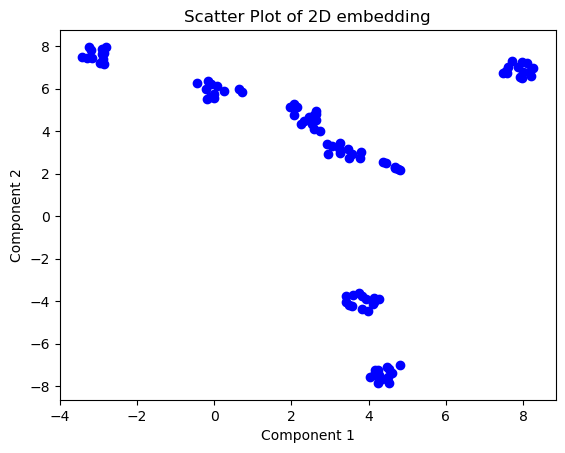

In [64]:
#By default UMAP always reduces to 2D embeddings
embedding_2D = reducer.fit_transform(merged_df_umap[['stance_1', 'stance_2', 'stance_3']])
print(f"Features' shape: {embedding_2D.shape}")
df_embedding_2D = pd.DataFrame(embedding_2D, columns=["Component 1", "Component 2"])
#adding back username column
user_embedding_2D = pd.concat([merged_df_umap["user"], df_embedding_2D], axis=1)
print(user_embedding_2D.head())

#plotting the 2 components
plt.scatter(df_embedding_2D["Component 1"], df_embedding_2D["Component 2"], color='blue', marker='o')

# Add labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter Plot of 2D embedding')

# Show the plot
plt.show()

In [22]:
#Same thing as above, but to 1D feature
reducer_1D = umap.UMAP(n_components=1, random_state=42)
embedding_1D = reducer_1D.fit_transform(merged_df_umap[['stance_1', 'stance_2', 'stance_3']])
print(f"Features' shape: {embedding_1D.shape}")
pd.DataFrame(embedding_1D).head()

Features' shape: (96, 1)


/home/dara/miniconda3/envs/bach_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/dara/miniconda3/envs/bach_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,0
0,-2.241299
1,5.360138
2,5.959476
3,4.689219
4,1.814633


In [23]:
df_embedding_1D = pd.DataFrame(embedding_1D, columns=["Component 1"])
#adding back username column
user_embedding_1D = pd.concat([merged_df_umap["user"], df_embedding_1D], axis=1)
print(user_embedding_1D.head())

                user  Component 1
0       AlbionPrince    -2.241299
1   BenFoldsFourLoko     5.360138
2        Betrashndie     5.959476
3           BloodWiz     4.689219
4  Call_Me_Hurr1cane     1.814633


#### Adding the opinions on the network as node attributes

In [25]:
user_nodeid = pd.read_csv("reddit_22_51/user_nodeid.csv", sep="\t" )
user_nodeid_dict = user_nodeid.set_index('index')['nodeid'].to_dict()

In [28]:
#mapping usernames to ids
user_nodeid = pd.read_csv("reddit_22_51/user_nodeid.csv", sep="\t" )
user_nodeid_dict = user_nodeid.set_index('index')['nodeid'].to_dict()
user_embedding_1D['nodeid'] = user_embedding_1D['user'].map(user_nodeid_dict)

In [32]:
print(user_embedding_1D.shape)
user_embedding_1D.head()

(96, 3)


,user,Component 1,nodeid
0,AlbionPrince,-2.241299,858119.0
1,BenFoldsFourLoko,5.360138,146354.0
2,Betrashndie,5.959476,NaN
3,BloodWiz,4.689219,946726.0
4,Call_Me_Hurr1cane,1.814633,1234299.0


In [34]:
user_embedding_1D = user_embedding_1D.dropna(subset=['nodeid'])
user_embedding_1D.shape

(78, 3)

In [43]:
import networkx as nx
net_file = pd.read_csv("output_network/combined_network.csv", sep='\t')
G = nx.from_pandas_edgelist(net_file, "src", "trg")
net_file.head()

,src,trg,nij,score
0,798787,254684,1,0.977561
1,15548,430231,16,0.999147
2,1209510,410689,13,0.998674
3,1209510,695649,1,0.915443
4,419460,1234244,3,0.981948


In [44]:
print(G)

Graph with 516 nodes and 2789 edges


In [46]:
node_attr_dict = user_embedding_1D.set_index('nodeid')['Component 1'].to_dict()
nx.set_node_attributes(G, node_attr_dict, 'Component 1')

# # Verify by printing a few node attributes
# for node in user_embedding_1D['nodeid']:
#     print(f"Node {node}, Attribute: {G.nodes[node].get('Component 1', 'No attribute')}")

In [48]:
print(nx.get_node_attributes(G, "Component 1"))

{146354: 5.360138416290283, 1213020: 5.037425518035889, 928681: 3.5870556831359863, 150148: 14.080035209655762}


In [50]:
user_embedding_1D["Component 1"][user_embedding_1D["nodeid"]==146354]

1    5.360138
Name: Component 1, dtype: float32

#### Dimensionality reduction - PCA

In [10]:
merged_df_pca = merged_df.copy()

In [11]:
from sklearn.decomposition import PCA
import sklearn.preprocessing as pre

In [12]:
# scaling the images
scaler = pre.StandardScaler()
merged_df_pca[["stance_1", "stance_2", "stance_3"]] = scaler.fit_transform(merged_df_pca[["stance_1", "stance_2", "stance_3"]])

In [13]:
pca = PCA(n_components=1)

In [14]:
merged_df_pca["pca_component"] = pca.fit_transform(merged_df_pca[["stance_1", "stance_2", "stance_3"]])

In [15]:
merged_df_pca

,user,stance_1,stance_2,stance_3,pca_component
0,AlbionPrince,0.374997,-1.287706,-0.726856,0.879965
1,BenFoldsFourLoko,-0.421439,1.278376,-1.096213,-1.476139
2,Betrashndie,-0.909514,0.648128,-0.393114,-1.171584
3,BloodWiz,0.931112,-1.081101,-1.267376,0.952963
4,Call_Me_Hurr1cane,-1.204722,0.934025,-1.356047,-1.863328
...,...,...,...,...,...
91,thebigslapper,-1.390422,-1.328817,0.350217,0.041481
92,throwrowrowawayyy,-1.402966,0.490570,0.667000,-1.071683
93,trogon,-1.209249,0.739818,1.220435,-0.931359
94,weeteacups,-0.454440,-1.153001,-1.268825,0.056044


In [15]:
def apply_pca(merged_df_topics, colume_list): 
    # scaler
    scaler = pre.StandardScaler()
    merged_df_topics[colume_list] = scaler.fit_transform(merged_df_topics[colume_list])

    # pca 
    pca = PCA(n_components=1)
    merged_df_topics["pca_component"] = pca.fit_transform(merged_df_topics[["stance_1", "stance_2", "stance_3"]])
    return merged_df_topics

In [16]:
apply_pca(merged_df_pca, ["stance_1", "stance_2", "stance_3"])

,user,stance_1,stance_2,stance_3,pca_component
0,AlbionPrince,-0.982052,-1.118597,-1.180277,-1.736947
1,BenFoldsFourLoko,1.120012,-0.382365,1.336297,0.809821
2,Betrashndie,-1.533003,1.486847,1.007579,1.555478
3,BloodWiz,1.138618,-0.579512,0.929322,0.388619
4,Call_Me_Hurr1cane,-0.910845,0.008304,0.950744,0.556389
...,...,...,...,...,...
91,thebigslapper,0.058330,-1.059824,-1.263380,-1.621922
92,throwrowrowawayyy,-1.514908,-1.004566,-1.214585,-1.748510
93,trogon,0.263054,-0.318900,-1.491373,-1.235430
94,weeteacups,0.921673,0.953872,-1.216253,-0.065420


In [16]:
pca.explained_variance_

array([1.36669598])

In [17]:
pca.explained_variance_ratio_

array([0.45081986])

#### Plotting the graphs for the dimensionality reduction

In [18]:
num_users = merged_df_pca.shape[0]


#### Missing users

In [20]:
user_nodeid = pd.read_csv("reddit_22_51/user_nodeid.csv", sep="\t" )

In [22]:
user_nodeid_dict = user_nodeid.set_index('index')['nodeid'].to_dict()

In [43]:
reclustered_monthly_data['nodeid'] = reclustered_monthly_data['user'].map(user_nodeid_dict)

In [ ]:

len(reclustered_monthly_data[reclustered_monthly_data['nodeid'].isna()]["user"].to_list())

221607

In [49]:
len(reclustered_monthly_data)

2162927

In [50]:
len(user_nodeid)

1240195

In [51]:
1240195-2162927

-922732

In [52]:
data = pd.read_csv("month_data/22_12.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

In [ ]:
user_nodeid = pd.read_csv("reddit_22_51/user_nodeid.csv", sep="\t" )
user_nodeid_dict = user_nodeid.set_index('index')['nodeid'].to_dict()

In [53]:
data['nodeid'] = data['user'].map(user_nodeid_dict)

In [55]:
len(data[data['nodeid'].isna()]["user"].to_list())

221607

In [56]:
missing_users = data[data['nodeid'].isna()]["user"].to_list()